In [1]:
# Import required libraries
import pandas as pd                                  # Pandas for data manipulation and loading CSVs
import numpy as np                                   # NumPy for numerical operations
import tensorflow as tf                              # TensorFlow for building and training models
from sklearn.model_selection import train_test_split # Used to split data into training and testing sets
import matplotlib.pyplot as plt                      # Used to visualize training progress
import warnings                                      # Used to manage warning messages
warnings.filterwarnings('ignore')   

In [3]:
# Load the IMDB dataset from CSV
data = pd.read_csv('IMDB Dataset.csv')               # Load dataset from CSV file
print(f"Original shape: {data.shape}")               # Print initial shape of the dataset

Original shape: (50000, 2)


In [4]:
# Preprocessing (Optional)
print(data.isnull().sum())                           # Count and print null values per column
print(data.duplicated().sum())                       # Print total number of duplicate rows
# Drop rows with missing values in 'review' or 'sentiment', and remove duplicates based on 'review'
data = data.dropna(subset=['review', 'sentiment']).drop_duplicates(subset=['review'])
print(f"Shape after removing Null & duplicates: {data.shape}")  # Print shape after cleaning


review       0
sentiment    0
dtype: int64
418
Shape after removing Null & duplicates: (49582, 2)


In [5]:
# Encode labels ('positive' -> 1, 'negative' -> 0)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})  # Map string labels to integers
data['sentiment'] = (data['sentiment'] == 'positive').astype(int)          # Ensures only 1s and 0s (redundant but safe)
print(data['sentiment'].value_counts())                      # Print number of positive and negative reviews

sentiment
0    49582
Name: count, dtype: int64


In [6]:
# Separate features and target
X = data['review'].values                       # Feature: reviews (text)
y = data['sentiment'].values                    # Target: sentiment (0 or 1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)       # random_state ensures reproducibility
print(f"Training set shape: {X_train.shape}Test set shape: {X_test.shape}")  # Print split shapes

Training set shape: (39665,)Test set shape: (9917,)


In [7]:
# Text vectorization
max_words = 10000                                           # Max number of unique words to consider
max_len = 200                                               # Max sequence length (padding/truncation)
vectorizer = tf.keras.layers.TextVectorization(             # Create text vectorization layer
    max_tokens=max_words,                                   # Limit vocabulary size
    output_mode='int',                                      # Convert text to integers
    output_sequence_length=max_len                          # Fix sequence length to 200 tokens
)
vectorizer.adapt(X_train)                                   # Learn the vocabulary from training text

In [8]:
# Build the neural network model
model = tf.keras.Sequential([                               # Create a sequential model
    vectorizer,                                             # First layer: text vectorization
    tf.keras.layers.Embedding(max_words, 16, input_length=max_len),  # Word embedding (dense vector of size 16)
    tf.keras.layers.GlobalAveragePooling1D(),              # Pooling layer that averages over word embeddings
    tf.keras.layers.Dense(16, activation='relu'),          # Hidden dense layer with ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')         # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',                      # Adam optimizer for efficient gradient descent
    loss='binary_crossentropy',           # Binary classification loss function
    metrics=['accuracy']                  # Track accuracy during training and evaluation
)


In [13]:
# Train the model
history = model.fit(
    X_train, y_train,                     # Input features and labels
    epochs=5,                            # Train for 10 full passes over the training data
    batch_size=32,                        # Train in mini-batches of 32 samples
    validation_split=0.2,                 # Use 20% of training data for validation
    verbose=1                             # Display training progress
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)  # Evaluate on test set (no output)
print(f'\nTest Loss: {test_loss:.4f}')                           # Print test loss (rounded to 4 decimal places)
print(f'Test Accuracy: {test_acc:.2%}')                          # Print test accuracy as percentage


Epoch 1/5
992/992 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 1.0000 - loss: 1.5875e-06 - val_accuracy: 1.0000 - val_loss: 1.0060e-06
Epoch 2/5
992/992 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 1.0000 - loss: 8.6586e-07 - val_accuracy: 1.0000 - val_loss: 5.7063e-07
Epoch 3/5
992/992 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 1.0000 - loss: 5.1035e-07 - val_accuracy: 1.0000 - val_loss: 3.3171e-07
Epoch 4/5
992/992 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 1.0000 - loss: 3.0575e-07 - val_accuracy: 1.0000 - val_loss: 1.9626e-07
Epoch 5/5
992/992 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 1.0000 - loss: 1.7843e-07 - val_accuracy: 1.0000 - val_loss: 1.1809e-07

Test Loss: 0.0000
Test Accuracy: 100.00%


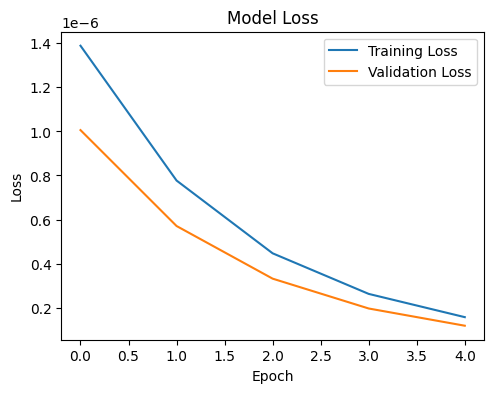

In [14]:
# Plot results
plt.figure(figsize=(12, 4))                                      # Set figure size for plots
# Plot training and validation loss
plt.subplot(1, 2, 1)                                             # First subplot
plt.plot(history.history['loss'], label='Training Loss')        # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.title('Model Loss')                                         # Title for loss graph
plt.xlabel('Epoch')                                             # X-axis label
plt.ylabel('Loss')                                              # Y-axis label
plt.legend()                                                    # Add legend to distinguish lines

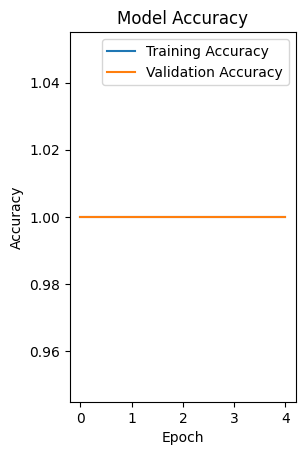

In [15]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)                                             # Second subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')       # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Validation accuracy
plt.title('Model Accuracy')                                     # Title for accuracy graph
plt.xlabel('Epoch')                                             # X-axis label
plt.ylabel('Accuracy')                                          # Y-axis label
plt.legend()                                                    # Add legend